In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot  as plt
from utils import *

# Part 1

In [ ]:
x0 = pd.read_csv("linear_vectorfield_data_x0.txt", header=None, sep="\s")

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
x1 = pd.read_csv("linear_vectorfield_data_x1.txt", header=None, sep="\s")

In [ ]:
delta_t = 0.1

In [ ]:
v = (x1 - x0)/ delta_t
v

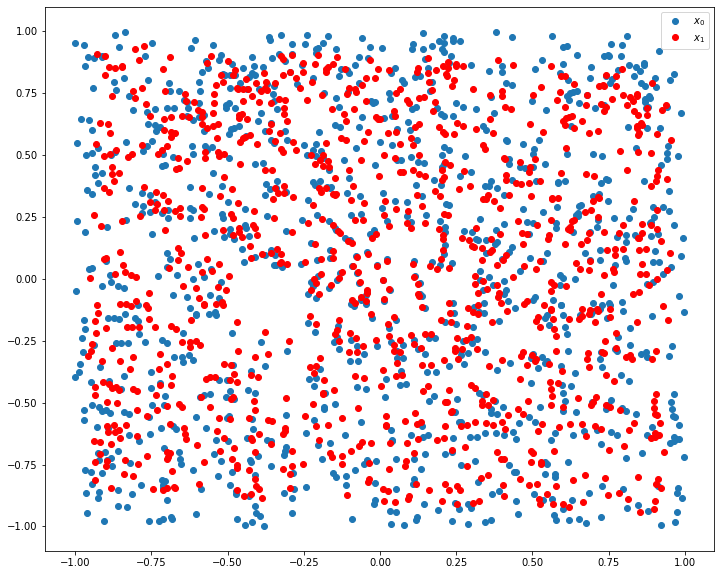

In [ ]:
plt.figure(figsize=(12, 10))
plt.plot(x0[0], x0[1], 'o', label='$x_0$')
plt.plot(x1[0], x1[1], 'ro', label='$x_1$')
plt.legend()
plt.show()

In [ ]:
X = np.vstack([x0, np.zeros_like((x0))])
X.shape

(2000, 2)

In [ ]:
x0.shape

(1000, 2)

In [ ]:
A = np.linalg.lstsq(x0, v, rcond=1e0-6)[0]
A.shape

(2, 2)

In [ ]:
A

array([[-0.49355245, -0.4638232 ],
       [ 0.23191153, -0.95737573]])

# Part 2

In [ ]:
from tqdm import tqdm
import pandas as pd
from scipy.integrate import solve_ivp

In [ ]:
t_end = 0.1
estimate_x1 = []
for x0_1 in tqdm(x0.values):
    sol = solve_ivp(linear_system, [0, t_end], x0_1, args=([A]), dense_output=True)
    estimate_x1.append(sol.y[:,0])
estimate_x1 = np.vstack(estimate_x1)

100%|██████████| 1000/1000 [00:00<00:00, 3000.34it/s]


In [ ]:
mse = (np.square(estimate_x1 - x1.values)).mean()
mse

0.002439323193918275

# Part 3

In [ ]:
t_end = 100
x0_1 = [10, 10]
sol = solve_ivp(linear_system, [0, t_end], x0_1, args=([A]), dense_output=True)

In [ ]:
w = 11
Y, X = np.mgrid[-w:w:100j, -w:w:100j]

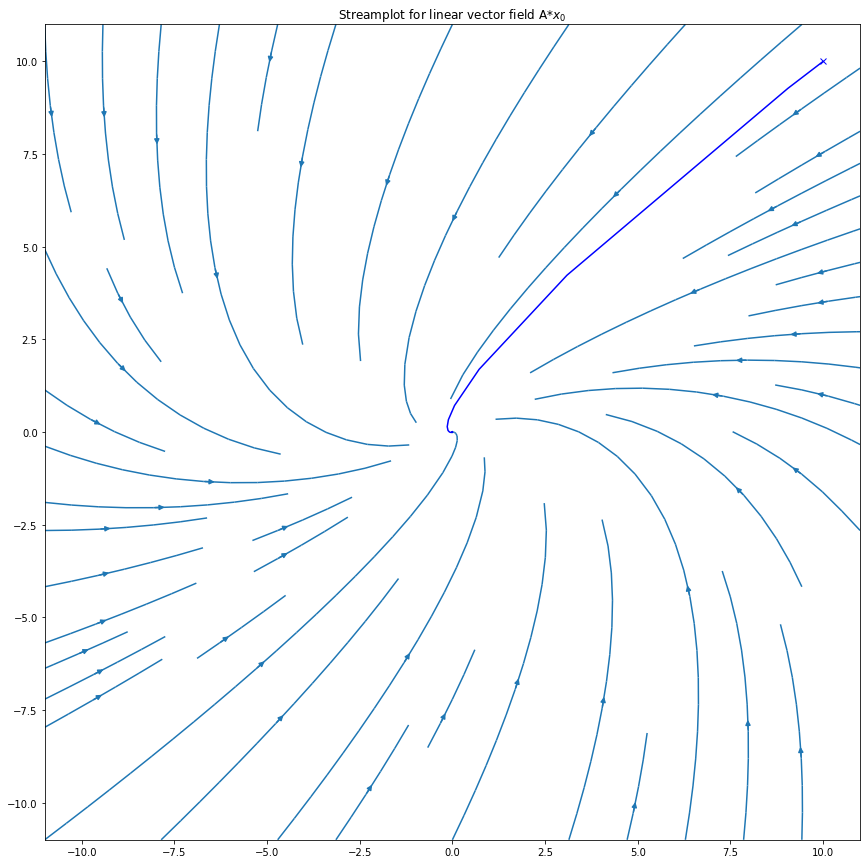

In [ ]:
ax = plot_phase_portrait(A, X, Y)
ax.plot(sol.y[0], sol.y[1], "b")
ax.plot(sol.y[0][0], sol.y[1][0], "xb")